# Train regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
# === Step 1: Load Data ===
features_df = pd.read_csv("../1-baseline/audio_features.csv")
labels_df = pd.read_csv("../1-baseline/dataset_labels.csv")

merged_df = pd.merge(features_df, labels_df, on="file")

In [15]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# === Step 4: Train Model ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# === Step 5: Predict & Evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0192


In [19]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -0.012519    -2.992010      0.041092     -0.134495      -0.040910   
1   -0.024472     0.002987     -1.996560     -0.041196      -0.071964   
2   -0.029784     0.004033      8.052386     -0.068106      -0.066302   
3   -0.002393     0.001115      0.049439     -0.125643       1.017038   
4   -0.002493    -0.000170      0.035585     10.926612       0.035963   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0         -3.0           0.0           0.0            0.0  
1         0.0          0.0          -2.0           0.0            0.0  
2         0.0          0.0           8.0           0.0            0.0  
3         0.0          0.0           0.0           0.0            1.0  
4         0.0          0.0           0.0          11.0            0.0  


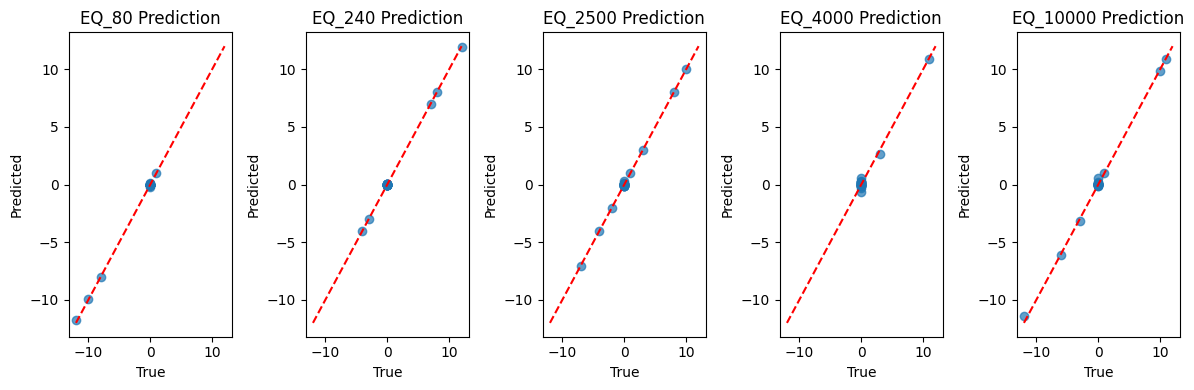

In [20]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


## Interpolation test

In [21]:
# === Step 1: Load Interpolation Set ===
features_interp = pd.read_csv("../audio_features.csv")
labels_interp = pd.read_csv("../dataset_labels.csv")

merged_interp = pd.merge(features_interp, labels_interp, on="file")

X_interp = merged_interp.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y_interp = merged_interp[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# === Step 2: Scale (用剛剛 train set 的 scaler) ===
X_interp_scaled = scaler.transform(X_interp)


In [22]:
# === Step 3: Predict ===
y_interp_pred = model.predict(X_interp_scaled)
mse_interp = mean_squared_error(y_interp, y_interp_pred)
print(f"Interpolation Set Mean Squared Error: {mse_interp:.4f}")

# === Step 4: Compare Predictions ===
pred_interp_df = pd.DataFrame(y_interp_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_interp_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_interp.reset_index(drop=True)
print(pred_interp_df.head())



Interpolation Set Mean Squared Error: 20.1045
   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0  -10.960055   -12.002621     -9.566853    -18.418419      -9.706187   
1  -10.912154   -11.991545     -9.359614    -18.916022      -2.683915   
2  -10.963686   -11.995890     -9.504201    -18.588111      -6.145317   
3  -10.802201   -11.987202     -9.104247    -19.489014       0.658194   
4  -10.168709   -11.942564     -8.626239    -20.377599       7.645523   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         -12          -12           -12           -12            -12  
1         -12          -12           -12           -12             -4  
2         -12          -12           -12           -12             -8  
3         -12          -12           -12           -12              0  
4         -12          -12           -12           -12             12  


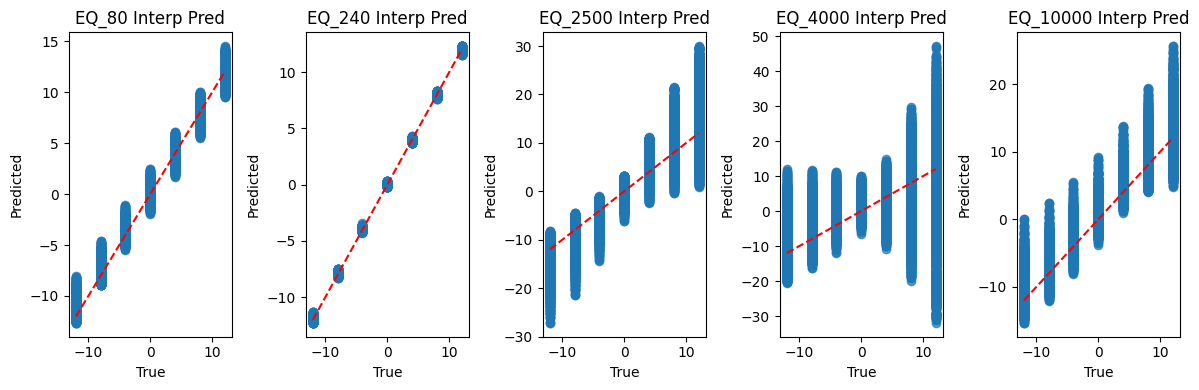

In [23]:
# === Step 5: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_interp_df[f"{label}_true"], pred_interp_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Interp Pred")
plt.tight_layout()
plt.show()